Simpson's Paradox is an interesting statistical property that arises when you arrive at misleading conclusions due to overlooking confounding variables in your data.

Ultimately, the only way to overcome the paradox (should it even arise...) is a thorough understanding of your data and that it represents.

### Simple Overview

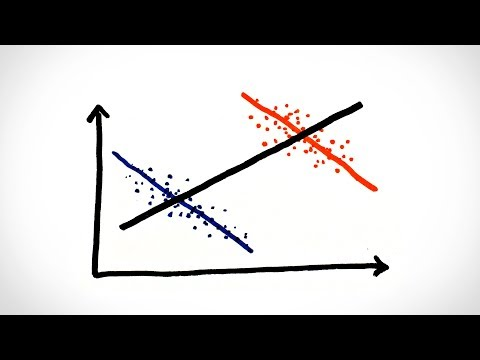

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('ebEkn-BiW5k')

### A More Concrete Example

In [2]:
import requests
import pandas as pd

We'll lean on [a longitudinal dataset from South Africa](http://jse.amstat.org/datasets/birthtoten.txt).

In [3]:
conn = requests.get('http://jse.amstat.org/datasets/birthtotenb.dat.txt')

In [4]:
df = pd.DataFrame.from_records(conn.text.split('\n'))
df = df[[0, 2, 4]]
df.columns = ['aid', 'traced', 'race']
df.drop(1590, inplace=True)
df = df.applymap(int)
df.head()

,aid,traced,race
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


The dataset is comprised of of three variables:

- `aid`: Whether or not the patient had insurance
- `traced`: Whether or not newborns had five-year follow appointments
- `race`: `1` being White, `2` Black

A naive look at the mean `traced` proportions, suggests that having insurance makes you *less likely to have a follow up appointment*.

In [5]:
df.groupby('aid')['traced'].agg(['mean', 'size'])

,mean,size
aid,,
0,0.274277,1349
1,0.190871,241


However, when you also break out by race, we can see that this idea doesn't hold.

In fact, regardless of race, having insurance makes you objectively *more likely* to follow-up.

In [6]:
df.groupby(['aid', 'race'])['traced'].mean().unstack()

race,1,2
aid,,
0,0.083333,0.277736
1,0.087719,0.283465


All told, through investigation, the more glaring isight this datset gives is the disproportionate level of care provided race-to-race.

In [7]:
df.groupby('race')['aid'].mean()

race
1    0.826087
2    0.087466
Name: aid, dtype: float64